<a href="https://colab.research.google.com/github/LakshmiSrivastava/DSML-Aug-2023/blob/main/LoanTapLogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Business Case: LoanTap Logistic Regression


LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

Dataset: LoanTapData.csv

Data dictionary:

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term : The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate : Interest Rate on the loan
installment : The monthly payment owed by the borrower if the loan originates.
grade : LoanTap assigned loan grade
sub_grade : LoanTap assigned loan subgrade
emp_title :The job title supplied by the Borrower when applying for the loan.*
emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
annual_inc : The self-reported annual income provided by the borrower during registration.
verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
issue_d : The month which the loan was funded
loan_status : Current status of the loan - Target Variable
purpose : A category provided by the borrower for the loan request.
title : The loan title provided by the borrower
dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line :The month the borrower's earliest reported credit line was opened
open_acc : The number of open credit lines in the borrower's credit file.
pub_rec : Number of derogatory public records
revol_bal : Total credit revolving balance
revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc : The total number of credit lines currently in the borrower's credit file
initial_list_status : The initial listing status of the loan. Possible values are – W, F
application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
mort_acc : Number of mortgage accounts.
pub_rec_bankruptcies : Number of public record bankruptcies
Address: Address of the individual
Concept Used:

Exploratory Data Analysis
Feature Engineering
Logistic Regression
Precision Vs Recall Tradeoff
What does ‘good’ look like?

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)
Check correlation among independent variables and how they interact with each other
Simple Feature Engineering steps:
E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies

Missing values and Outlier Treatment
Scaling - Using MinMaxScaler or StandardScaler
Use Logistic Regression Model from Sklearn/Statsmodel library and explain the results

Classification Report
ROC AUC curve
Precision recall curve
Tradeoff Questions:
How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
Provide actionable Insights & Recommendations


Define Problem Statement and perform Exploratory Data Analysis
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variable)
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Data Preprocessing
Duplicate value check
Missing value treatment
Outlier treatment
Feature engineering
Data preparation for modeling
Model building
Build the Logistic Regression model and comment on the model statistics
Display model coefficients with column names
Results Evaluation
ROC AUC Curve & comments
Precision Recall Curve & comments
Classification Report (Confusion Matrix etc)
Tradeoff Questions:
How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. (10 Points)
Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)
Actionable Insights & Recommendations (10 Points)

Questionnaire (Answers should present in the text editor along with insights):

What percentage of customers have fully paid their Loan Amount?
Comment about the correlation between Loan Amount and Installment features.
The majority of people have home ownership as _______.
People with grades ‘A’ are more likely to fully pay their loan. (T/F)
Name the top 2 afforded job titles.
Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC
Precision
Recall
F1 Score
How does the gap in precision and recall affect the bank?
Which were the features that heavily affected the outcome?
Will the results be affected by geographical location? (Yes/No)
Discussion forum link: https://www.scaler.com/academy/mentee-dashboard/discussion-forum/p/ask-me-anything-business-case-loantap/21146



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as san
pd.set_option('display.max_columns', 500)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE


In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


**Data dictionary:**

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.eg . 26300.0-should be in 2 decimal places.

term : The number of payments on the loan. Values are in months and can be either 36 or 60. eg 36 months. moths(string value) must be truncated for numerical analysis.

int_rate : Interest Rate on the loan. eg 16.29

installment : The monthly payment owed by the borrower if the loan originates.eg. 928.40

grade : LoanTap assigned loan grade eg. A, B , C

sub_grade : LoanTap assigned loan subgrade eg. C5-C deduce from grade , shows feture redundency

emp_title :The job title supplied by the Borrower when applying for the loan.*eg. HR specialist.

emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. eg 10+ years, here + years and years should truncate.

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report. eg. RENT, MORTGAGE

annual_inc : The self-reported annual income provided by the borrower during registration. eg. 115000.0, should be in duble precision

verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified. Eg.verified

issue_d : The month which the loan was funded. eg. Apr-2012

loan_status : Current status of the loan - Target Variable, eg. Fully paid

purpose : A category provided by the borrower for the loan request.eg.

title : The loan title provided by the borrower

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line :The month the borrower's earliest reported credit line was opened

open_acc : The number of open credit lines in the borrower's credit file. eg 16.0

pub_rec : Number of derogatory public records, eg. 0.0

revol_bal : Total credit revolving balance

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc : The total number of credit lines currently in the borrower's credit file

initial_list_status : The initial listing status of the loan. Possible values are – W, F

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

mort_acc : Number of mortgage accounts.

pub_rec_bankruptcies : Number of public record bankruptcies

Address: Address of the individual

In [ ]:
df.shape

(396030, 27)

Insight: There are 396030 rows and 27 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Insight: emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies has null values.

There are 27 columns, among them one is target variable(loan_status) and 26 features. In all features 14 are categorical variable with 2 date and time type datatypes and rest 12 are numerical variable.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


Insight:
1. Loan Amount, Installments, Annual Income , revol_bal : all these columns have large differnece in mean and median and huge standard deviation. That means outliers are present in the data.

**Missing values and overall percentage:**

In [ ]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


**Insight:**
1. title, pub_rec_bankruptcies and revol_util has almost 0% NaN value, so we can drop them.
2. The percentage of nan values in mort_acc is more than 9%, so imputing mean values of mort_acc according to group values of total_acc will be fine.
3. Emp_title with anonymous and emp_length with 5.

In [ ]:
df.duplicated().sum()

0

Insight: No duplicate rows.

**Treatment of missing values:**

In [ ]:
df=df.dropna(subset=['title','pub_rec_bankruptcies','revol_util'])

total_acc_avg=df.groupby(by='total_acc').mean().mort_acc # saving mean of mort_acc according to total_acc_avg
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)
df['emp_title']=df['emp_title'].fillna('Anonymous')
df['emp_length']=df['emp_length'].fillna(5)


<ipython-input-259-3c785a981cec>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg=df.groupby(by='total_acc').mean().mort_acc # saving mean of mort_acc according to total_acc_avg


In [ ]:
df.isna().sum()/len(df)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [ ]:
df.nunique()

loan_amnt                 1391
term                         2
int_rate                   532
installment              55404
grade                        7
sub_grade                   35
emp_title               172227
emp_length                  12
home_ownership               6
annual_inc               27050
verification_status          3
issue_d                    112
loan_status                  2
purpose                     14
title                    48472
dti                       4242
earliest_cr_line           683
open_acc                    60
pub_rec                     20
revol_bal                55491
revol_util                1224
total_acc                  117
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 391162
dtype: int64

In [ ]:
columns_type=df.dtypes
len(columns_type[columns_type=="object"])

15

among 27 coulmns, there are 26 features and 1 target variable(loan_status).
and 15 categorical variables.


Cleaning of data:

In [ ]:
df['term']=df['term'].str.split(' ').str.get(1)
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})
df['emp_length']=df.emp_length.map({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5,
          '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10})


**Checking for outliers:**

TypeError: ignored

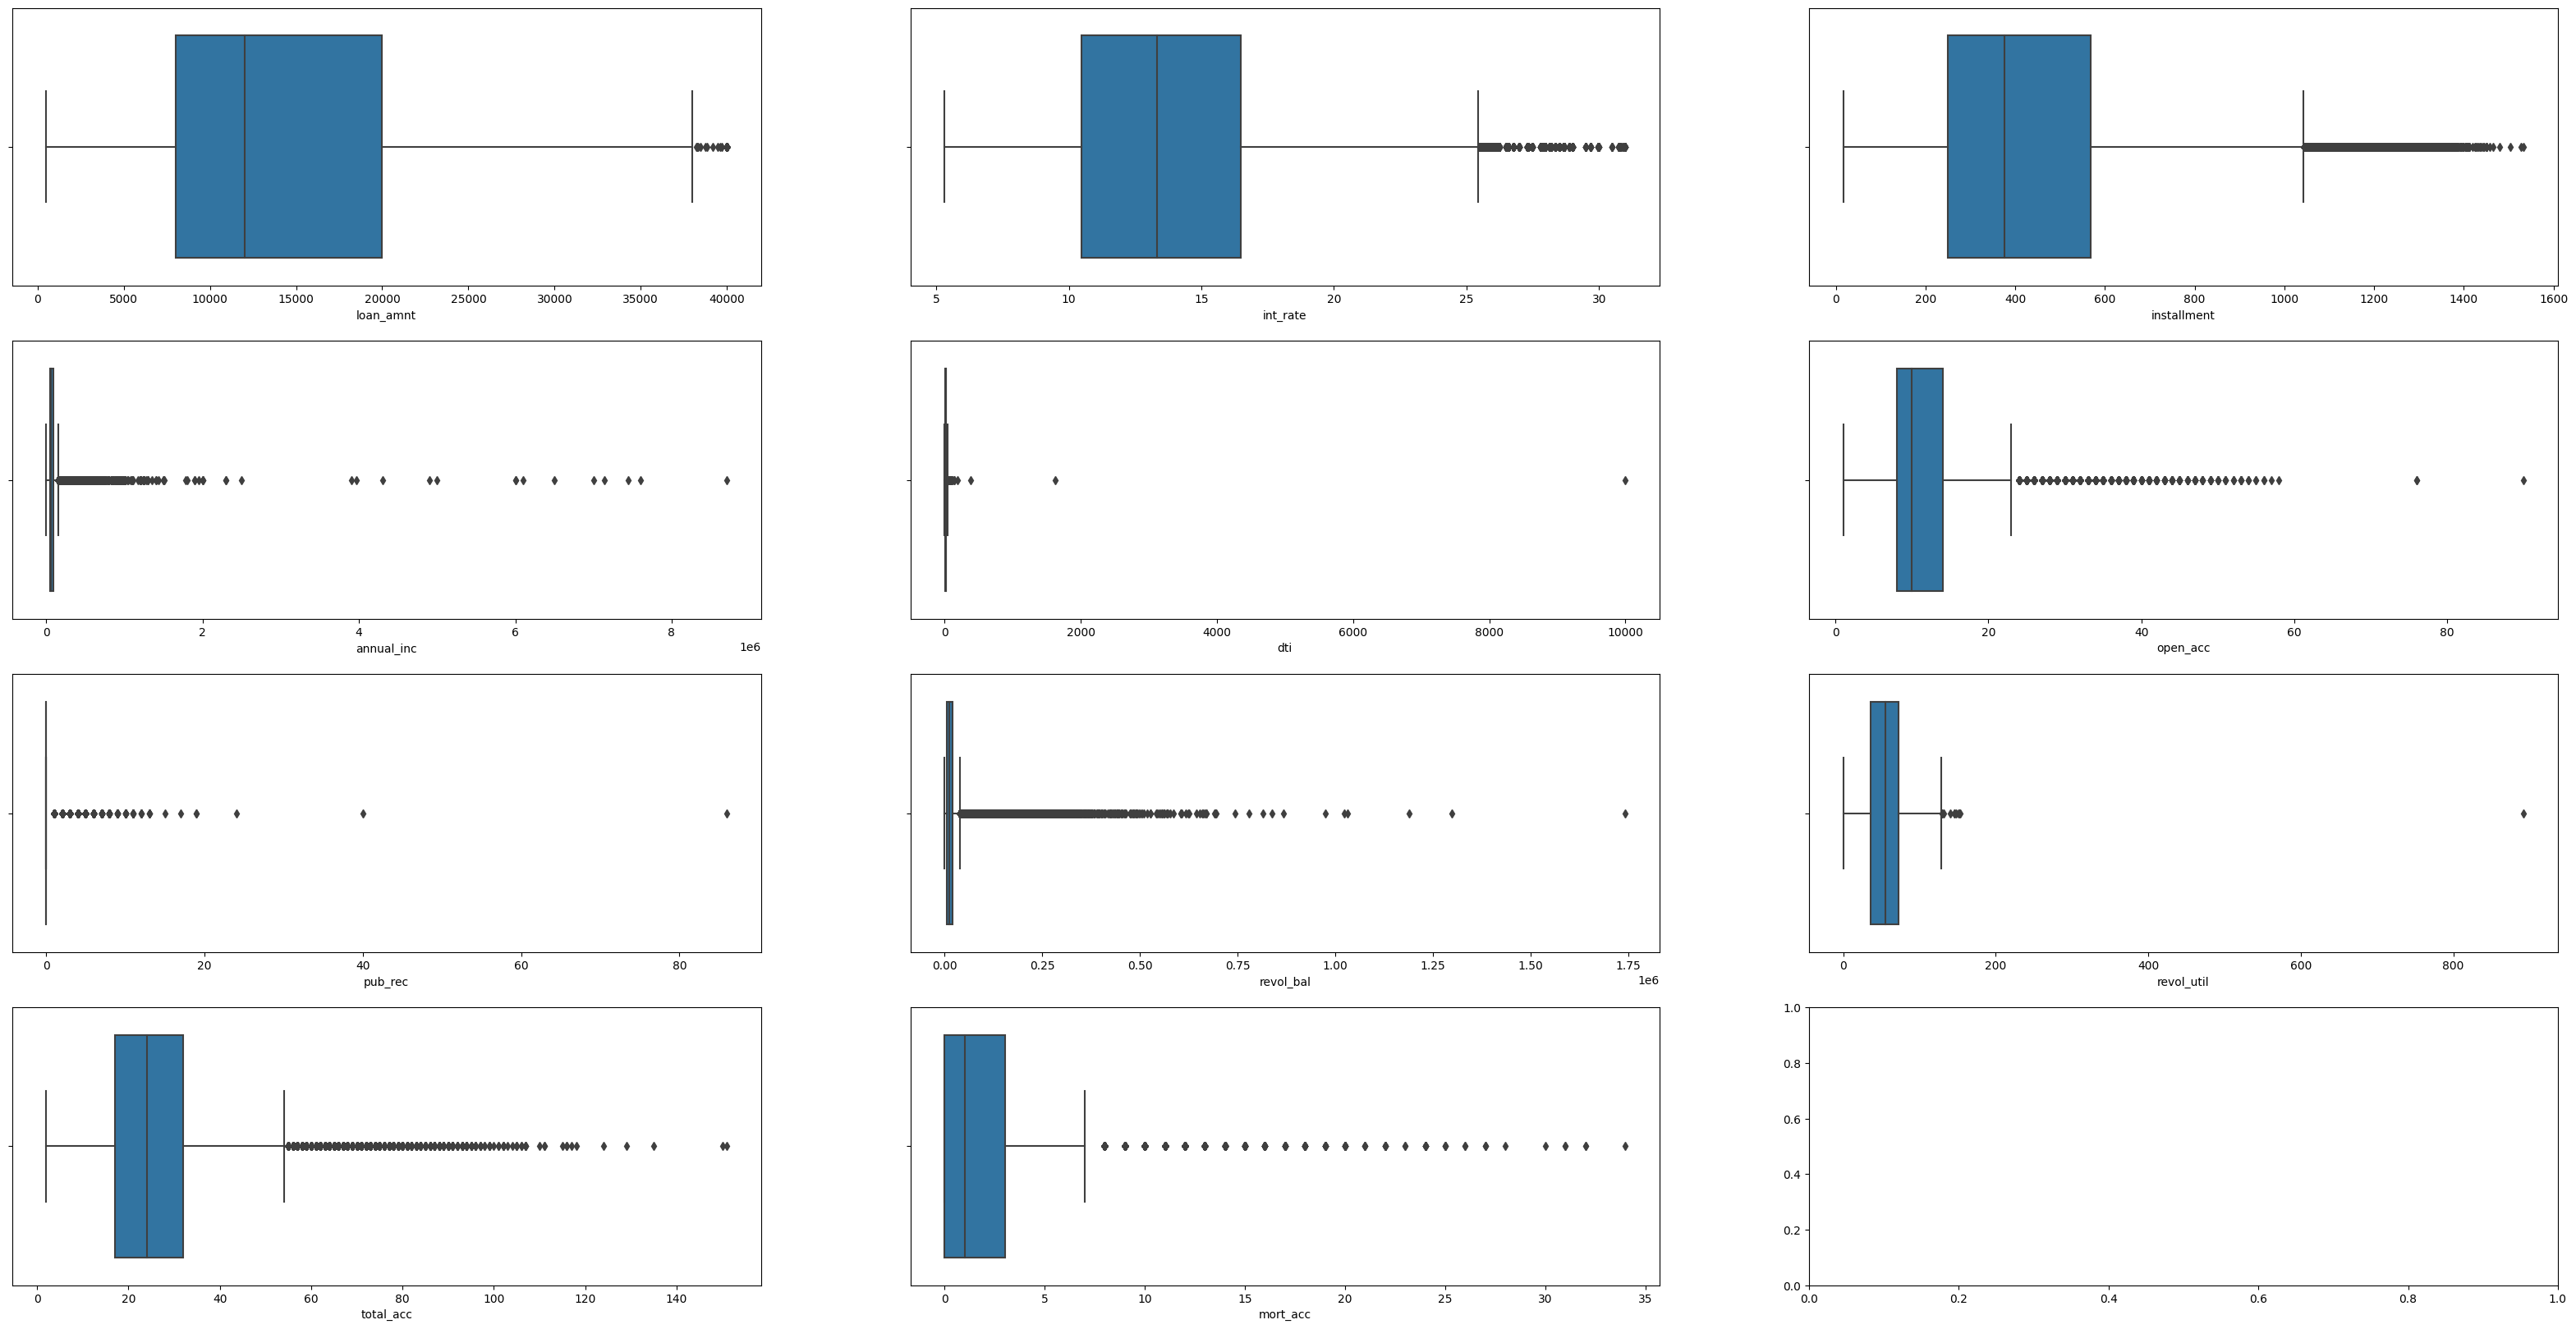

In [ ]:
cols=['loan_amnt','int_rate', 'installment',  'annual_inc', 'dti','open_acc', 'pub_rec', 'revol_bal','revol_util', 'total_acc','mort_acc']
f,a=plt.subplots(nrows=4, ncols=3, figsize=(40,4))
i=0
f.subplots_adjust(top=4)
for row in range(4):
  for col in range(3):
    san.boxplot(data=df, x=cols[i],ax=a[row,col])
    i+=1
plt.show()

Insight: There are many outliers in every features.

In [ ]:
cols=['loan_amnt','int_rate', 'installment',  'annual_inc',
'dti','open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',
       'mort_acc']
for i in range(len(cols)):
  print("outlier in  " +cols[i] )
  IQR=np.percentile(df[cols[i]],75)-np.percentile(df[cols[i]],25)
  print("IQR : ",IQR)
  Q1=np.percentile(df[cols[i]],25)
  print('Q1 : ',Q1)
  Q3=np.percentile(df[cols[i]],75)
  print('Q3 : ', Q3)
  upperlimit=Q3+(IQR*1.5)
  print("upperlimit : ",upperlimit)
  lowerlimit=Q1-(IQR*1.5)
  print("lowerlimit : ",lowerlimit)
  outlier=df[(df[cols[i]]>upperlimit) |(df[cols[i]]<lowerlimit)]
  print("outlier in" +cols[i] +": ",len(outlier))
  print("*********************************************")
  i+=1


outlier in  loan_amnt
IQR :  12000.0
Q1 :  8000.0
Q3 :  20000.0
upperlimit :  38000.0
lowerlimit :  -10000.0
outlier inloan_amnt:  181
*********************************************
outlier in  int_rate
IQR :  5.999999999999998
Q1 :  10.49
Q3 :  16.49
upperlimit :  25.489999999999995
lowerlimit :  1.4900000000000038
outlier inint_rate:  3716
*********************************************
outlier in  installment
IQR :  317.15999999999997
Q1 :  250.33
Q3 :  567.49
upperlimit :  1043.23
lowerlimit :  -225.40999999999994
outlier ininstallment:  11139
*********************************************
outlier in  annual_inc
IQR :  45000.0
Q1 :  45000.0
Q3 :  90000.0
upperlimit :  157500.0
lowerlimit :  -22500.0
outlier inannual_inc:  16581
*********************************************
outlier in  dti
IQR :  11.690000000000001
Q1 :  11.29
Q3 :  22.98
upperlimit :  40.515
lowerlimit :  -6.2450000000000045
outlier indti:  256
*********************************************
outlier in  open_acc
IQR :  6

Insight:
There are significant numbers of outliers in fetures specially in installment(11139), annual_inc(16581), open_acc(10228), revol_bal(21090) with highest outliers in  pub_rec(57391).

In [ ]:
cols=['loan_amnt','int_rate', 'installment',  'annual_inc',
'dti','open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',
       'mort_acc']

for i in range(2):
  Q1=df[cols[i]].quantile(0.25)
  Q3=df[cols[i]].quantile(0.75)
  IQR=Q3-Q1
  df = df[~((df[cols[i]] < (Q1 - 1.5 * IQR)) | (df[cols[i]] > (Q3 + 1.5 * IQR)))]
  df.reset_index(drop=True)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,0.0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,2.0,RENT,40000.0,Source Verified,2015-10-01,Fully Paid,debt_consolidation,Debt consolidation,15.63,2004-11-01,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36,12.29,700.42,C,C1,Agent,5.0,MORTGAGE,110000.0,Source Verified,2015-02-01,Fully Paid,debt_consolidation,Debt consolidation,21.45,2006-02-01,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,10.0,RENT,56500.0,Verified,2013-10-01,Fully Paid,debt_consolidation,pay off credit cards,17.56,1997-03-01,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10.0,MORTGAGE,64000.0,Verified,2012-08-01,Fully Paid,debt_consolidation,Loanforpayoff,15.88,1990-11-01,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


**What percentage of customers have fully paid their Loan Amount?**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

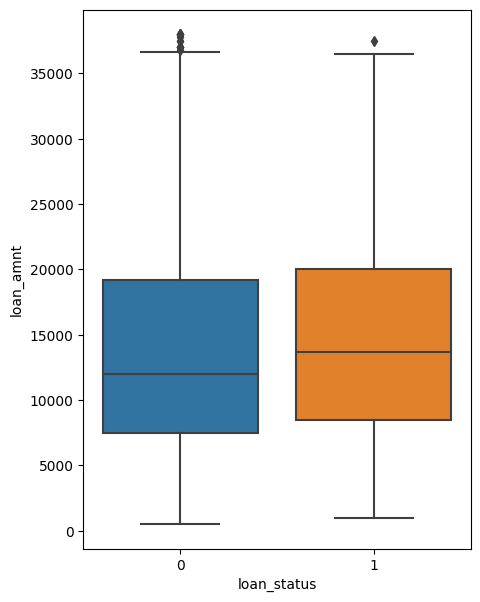

In [ ]:
df['loan_status'].value_counts(normalize=True)*100
plt.figure(figsize=(5,7))
san.boxplot(y=df["loan_amnt"],
            x=df["loan_status"])

Insight:
1. There is imbalance of data with 80.387% fully paid and 19.6129%.
2. There is difference between mean and median between Charged Off(higher) than Fully paid.
3. Also box plot shows number of outliers present in dataset.

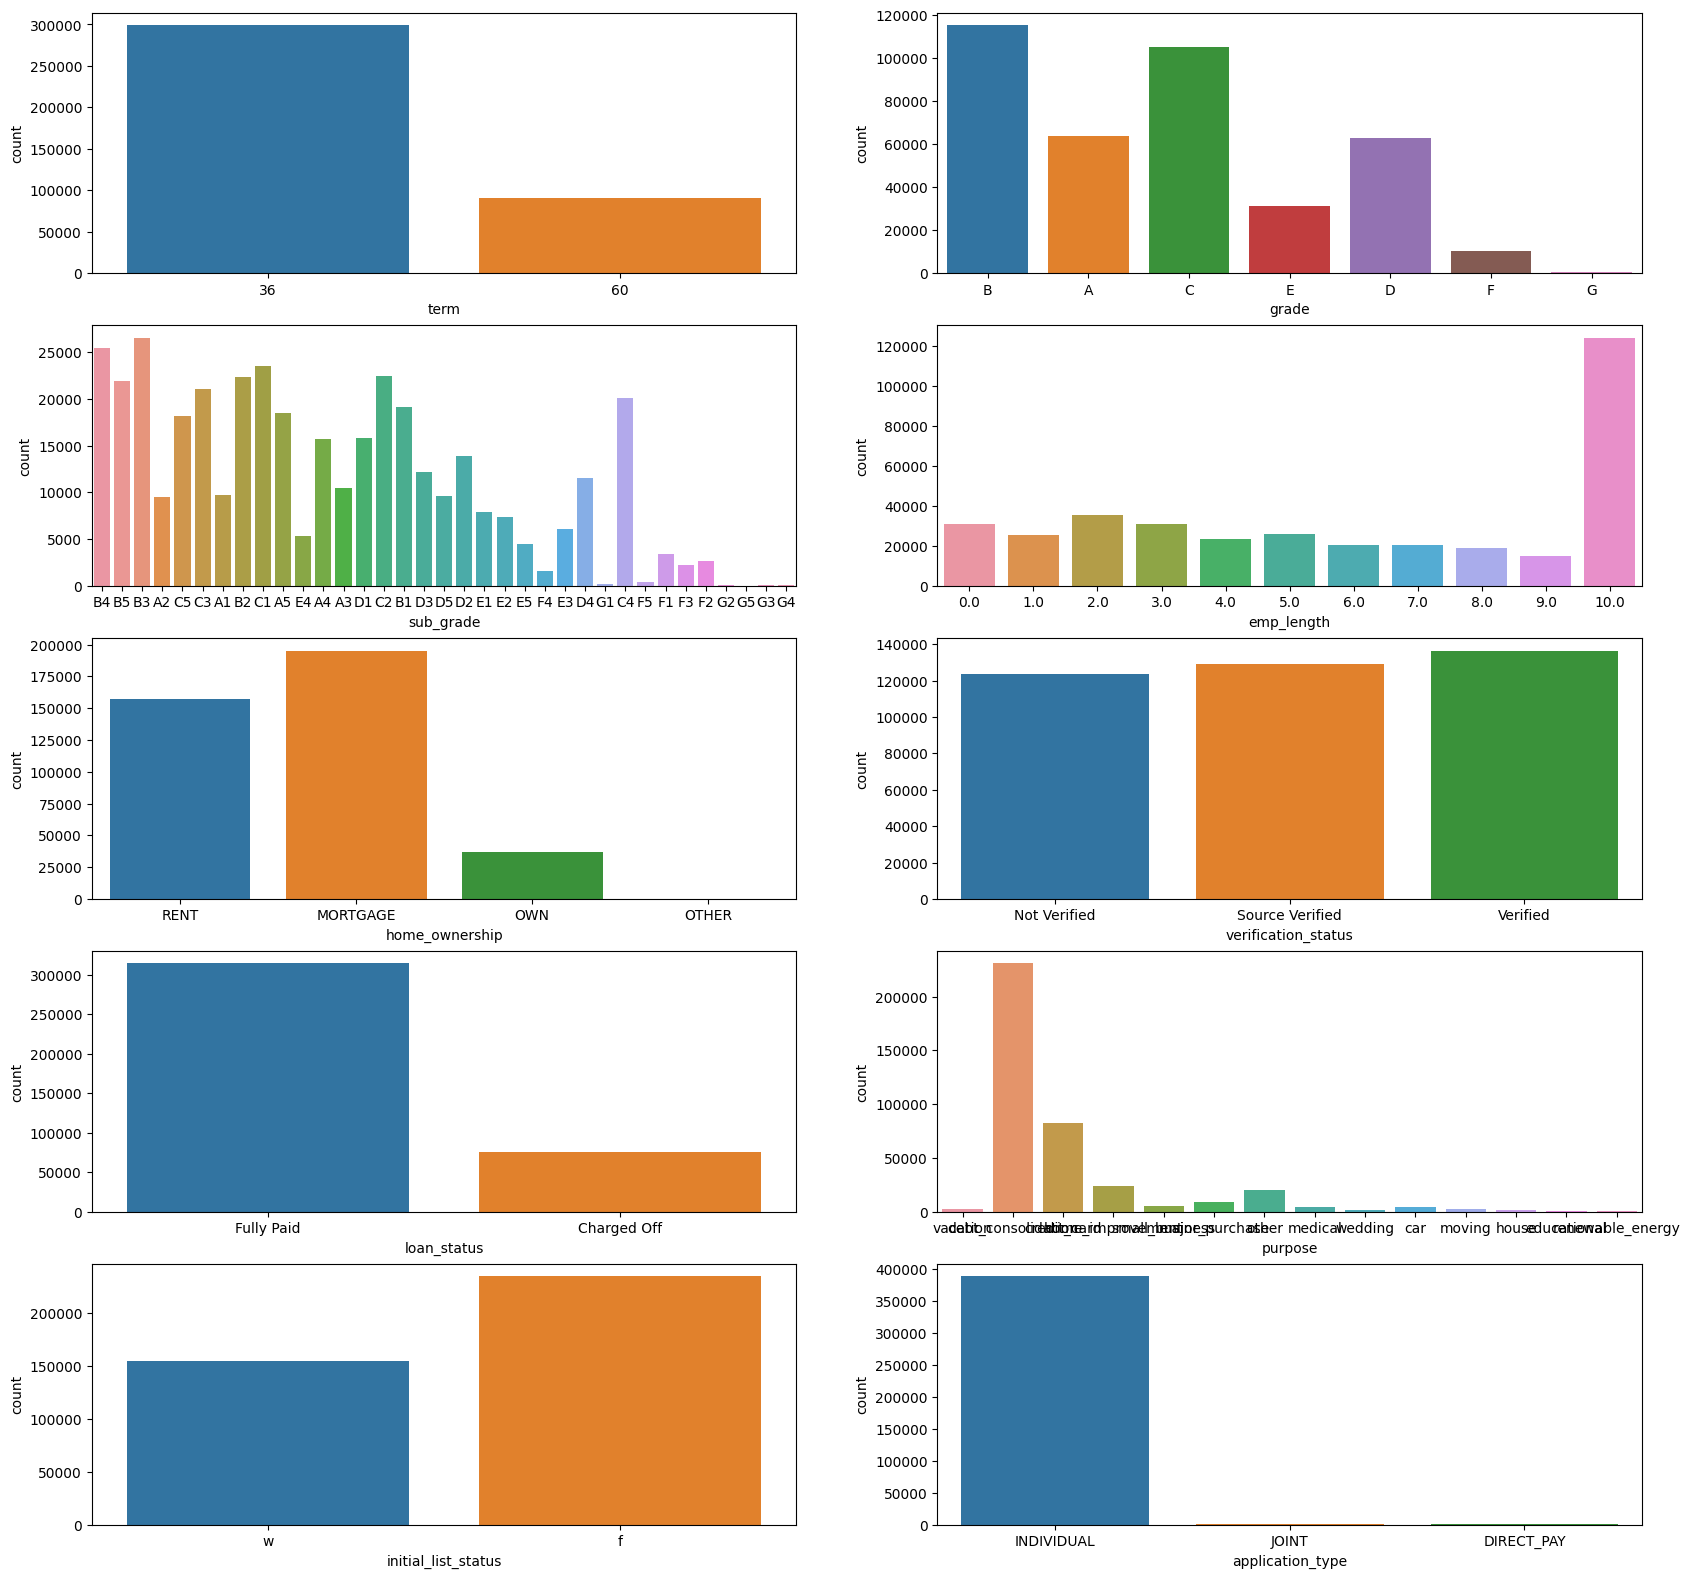

In [ ]:
cols=['term','grade','sub_grade', 'emp_length','home_ownership','verification_status',  'loan_status', 'purpose','initial_list_status','application_type']

f,a=plt.subplots(nrows=5, ncols=2, figsize=(20,8))
i=0
f.subplots_adjust(top=2)
for row in range(5):
  for col in range(2):
    san.countplot(data=df, x=cols[i],ax=a[row,col])
    plt.xlabel(cols[i])
    i+=1
plt.show()

Insight:
1. More loan were applied for 36 months period than 60 months period
2. Grade B and C has  more loans application than F an G.
3. B3 and B4 give more loans application and G5 and G4 the least.
4. 10+ years submit more loans application, may be because limit is undefined ie more than 10(11,12,13,14...any other)
5. Home owners having status morgage request for loan more.
6. categories of verification doesnt have a great impact.
7. Fully paid client has more loan application.
8. initial list status 'f' applied for the loan the most.
9. Individual applied for the loan the most.

**People with grades ‘A’ are more likely to fully pay their loan. (T/F)**


<Axes: xlabel='grade'>

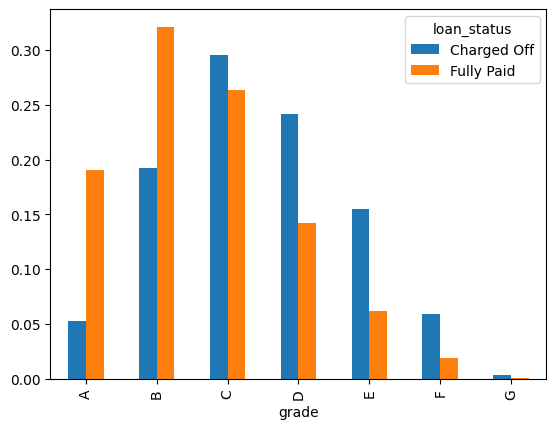

In [ ]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "index", margins = True)
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "columns").plot(kind  = "bar")

Insight:

Both numerically and visually seen that maximum number of B grade fully paid their loan.

**Name the top 2 afforded job titles**.

In [ ]:
df["emp_title"].value_counts(dropna=False).sort_values(ascending=False).head(15)

Anonymous           22477
Teacher              4317
Manager              4156
Registered Nurse     1825
RN                   1822
Supervisor           1770
Sales                1595
Project Manager      1471
Owner                1359
Driver               1295
Office Manager       1198
manager              1113
Director             1069
General Manager      1049
Engineer              973
Name: emp_title, dtype: int64

Insight:
Top two employee title is Teacher(4317) and Manager(4156)
In EDA visually represented the same.

 **The majority of people have home ownership as ___**.

=> Majority of people have home_ownership = Mortgage

In [ ]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index", margins = True)*100


loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,16.774461,83.225539
OTHER,16.312057,83.687943
OWN,20.381838,79.618162
RENT,22.360217,77.639783
All,19.370282,80.629718


Insight:
clients having Mortgage (home_ownership) have fully paid (83.225539) their loan.

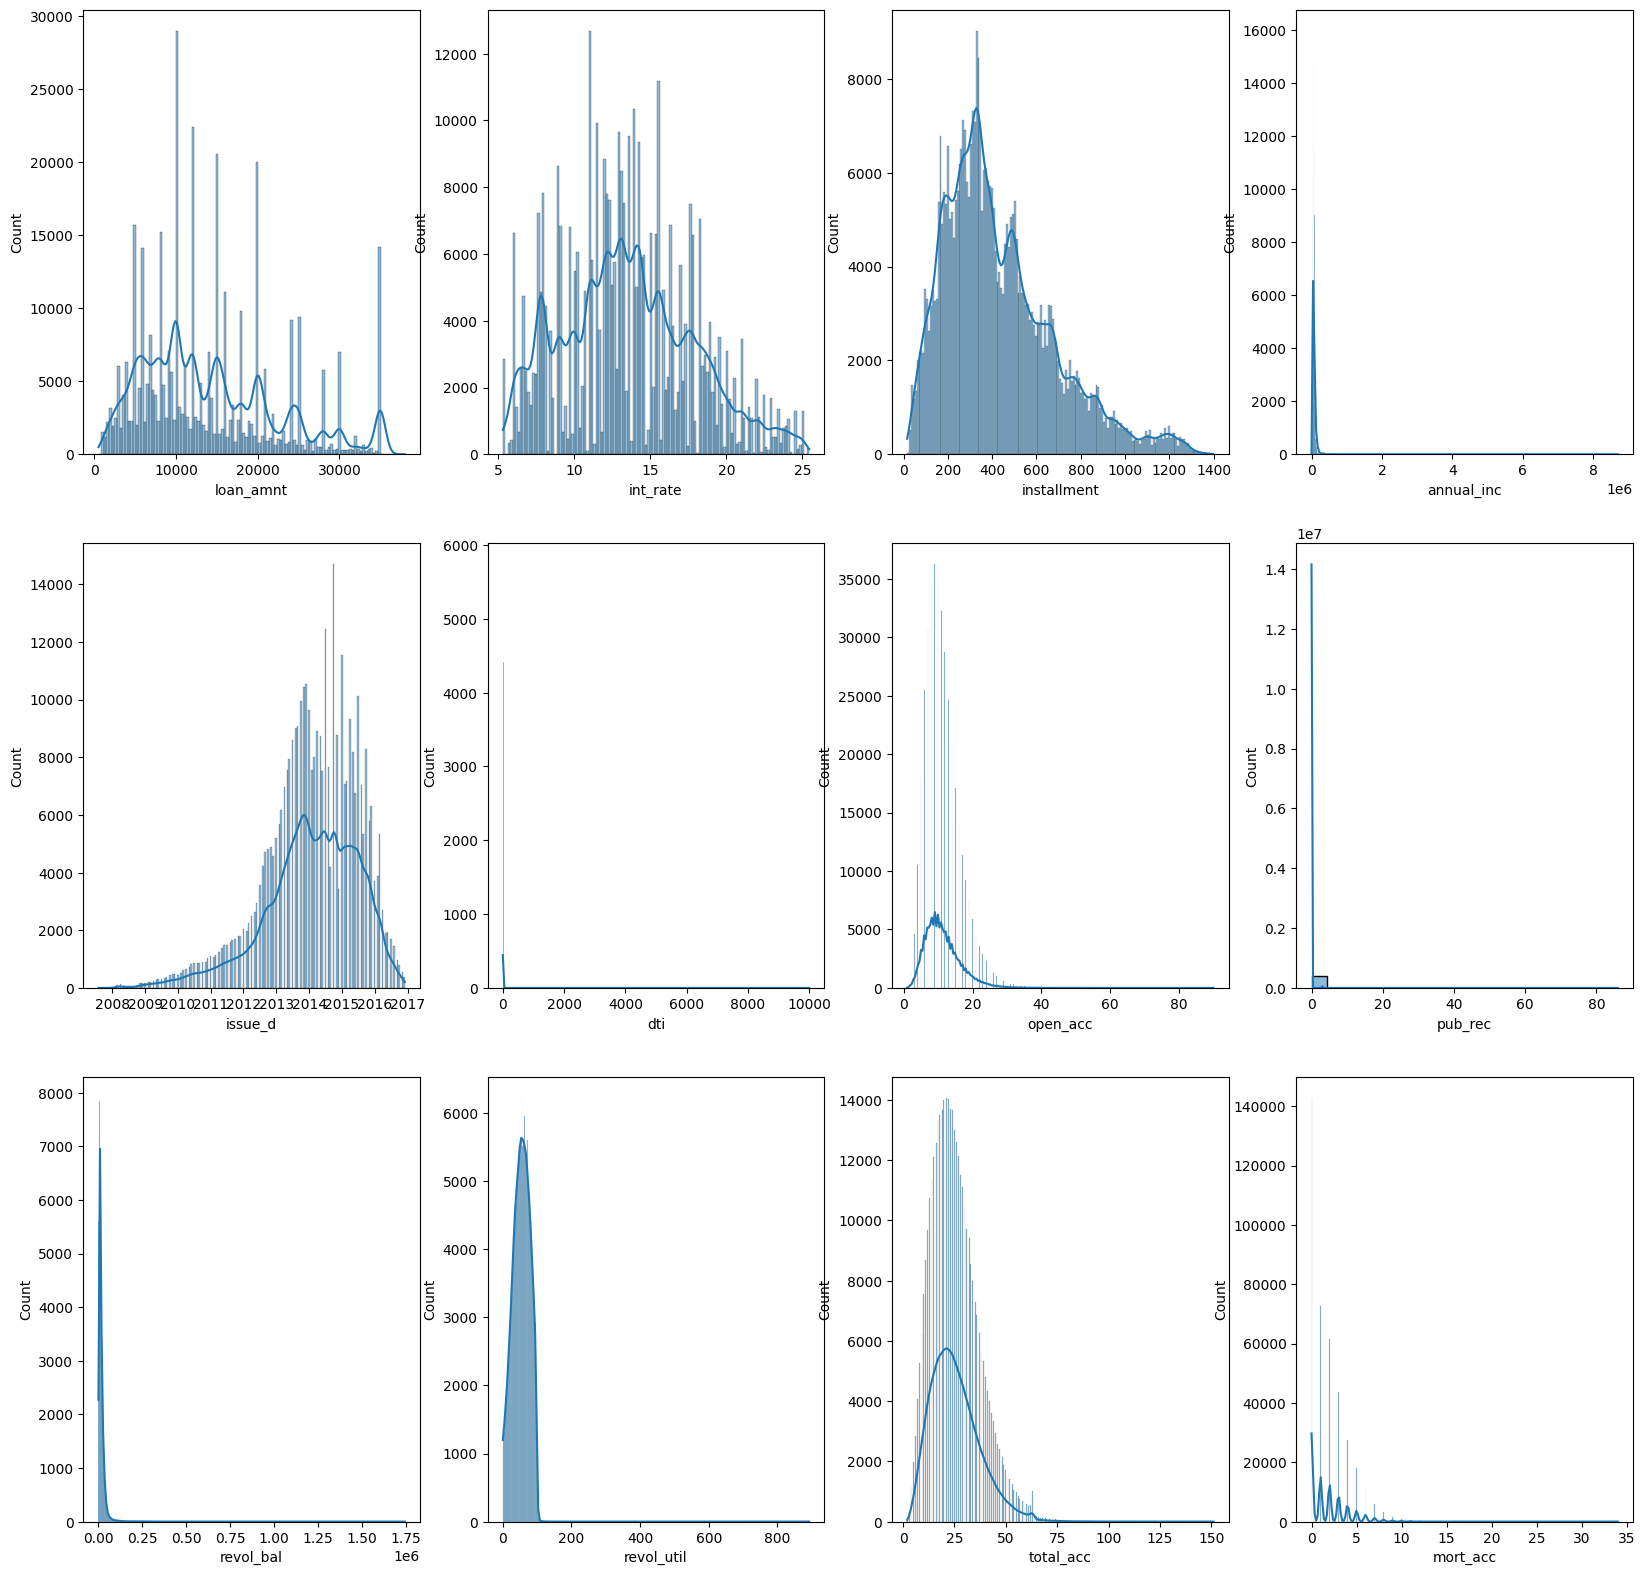

In [ ]:
nCols=['loan_amnt', 'int_rate', 'installment',  'annual_inc',
       'issue_d','dti','open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',
       'mort_acc']
f,a=plt.subplots(nrows=3, ncols=4, figsize=(20,8))
i=0
f.subplots_adjust(top=2)
for row in range(3):
  for col in range(4):
    san.histplot(data=df, x=nCols[i],kde=True, ax=a[row,col])
    plt.xlabel(nCols[i])
    i+=1
plt.show()

Insight:
1. loan amount 10000 was applied the most.
2. mean of interest rate is 13%
3. installment mean is 300.
4. annual increment 0 almost
5. open_ac, revol_util are normally destributed.
6. revol_bal total_acc are right skewed.
7. Most of the distribution are right or left skewed shows presence of outlier.

**Bivariate analysis:**

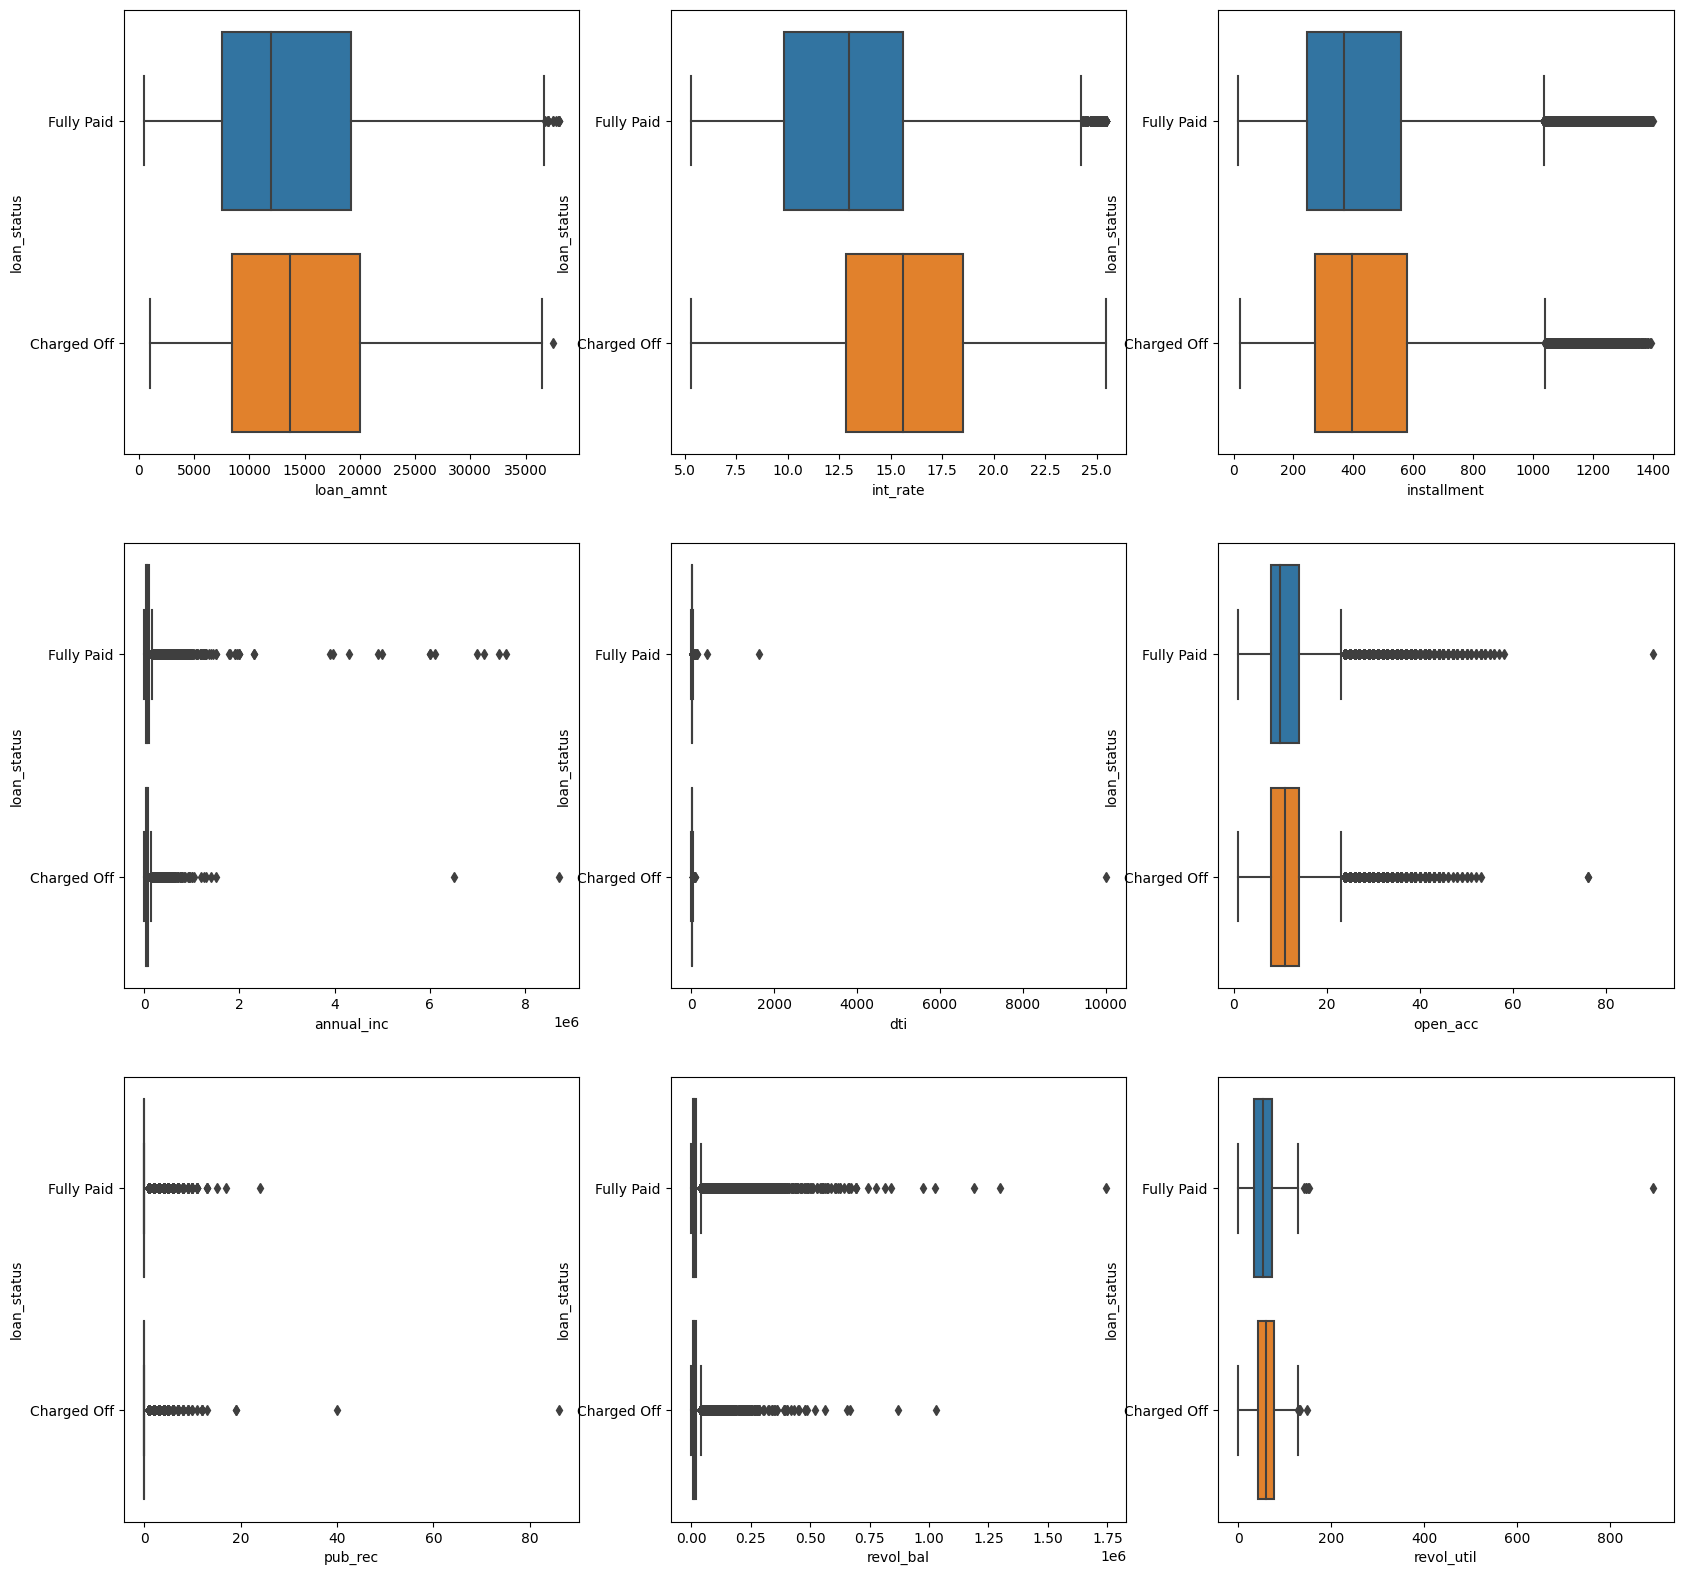

In [ ]:
cols=['loan_amnt', 'int_rate', 'installment',  'annual_inc',
'dti','open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',
       'mort_acc']


f,a=plt.subplots(nrows=3, ncols=3, figsize=(20,8))
i=0
f.subplots_adjust(top=2)
for row in range(3):
  for col in range(3):
    san.boxplot(data=df, x=cols[i],y='loan_status', ax=a[row,col])
    plt.xlabel(cols[i])
    i+=1
plt.show()

Insight:
1. If loan amount is less(arround 13500), then fully paid else charged off.
2. Client of charged _off loan status has to pay more intrest rate (16%) where as fully paid has 13.5%.
3. More installment was paid by charged off client.
4. Fully paid client has more annual increment.
5. dti is less for fully paid.
6. open_acc is almost same for both.
7. More derogatory charges on charged off client.
8. revol_bal is higher in fully paid client & vice versa for revol_util.

**Correlation Check-**
**Comment about the correlation between Loan Amount and Installment features.**

<ipython-input-33-b094898ba8ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  san.heatmap(df.corr(method='spearman'), annot=True)


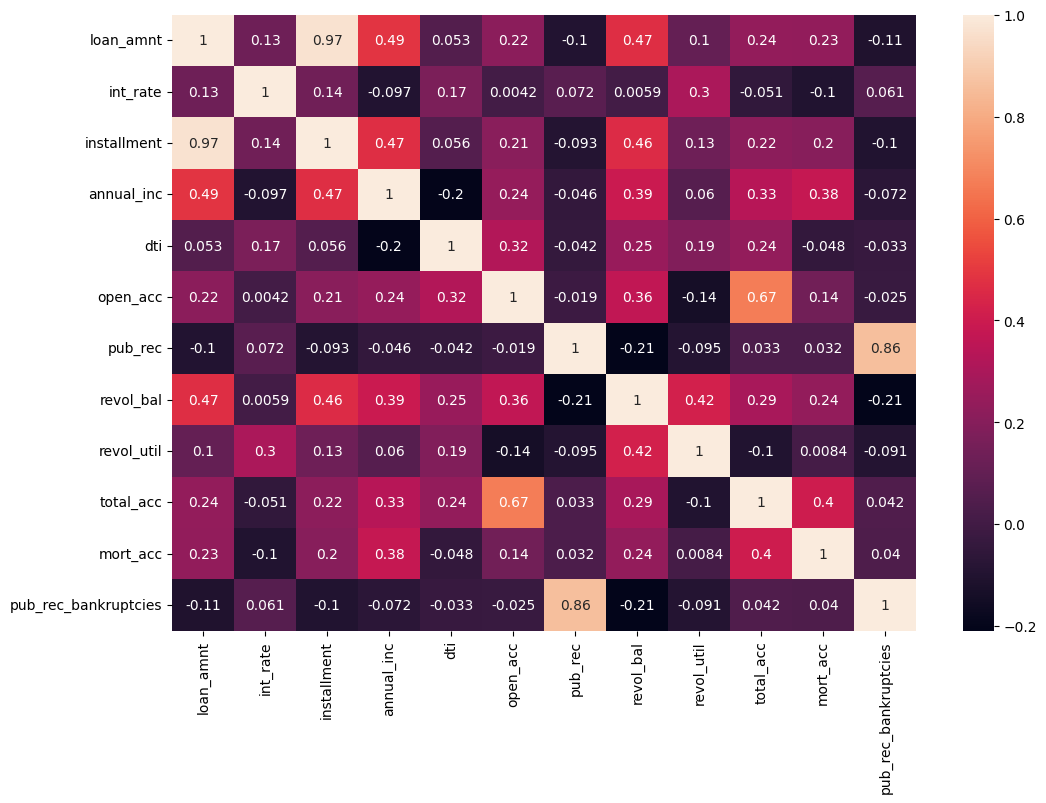

In [ ]:
plt.figure(figsize=(12, 8))
san.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

 corelation between loan_amount and installments is very high (i.e. 0.97).
This indicates high multicollinearity between these two features. This in turn resulted in high VIF value (i.e. 11.91).
Because of this HIGH VIF value, column must drop to make the model linear as one of the assumption of linear model is no multicollinearity.



In [ ]:
df=df.drop(columns='loan_amnt', axis=1)

<ipython-input-151-fa12682c658b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  san.pairplot(df.corr(),kind= 'reg')


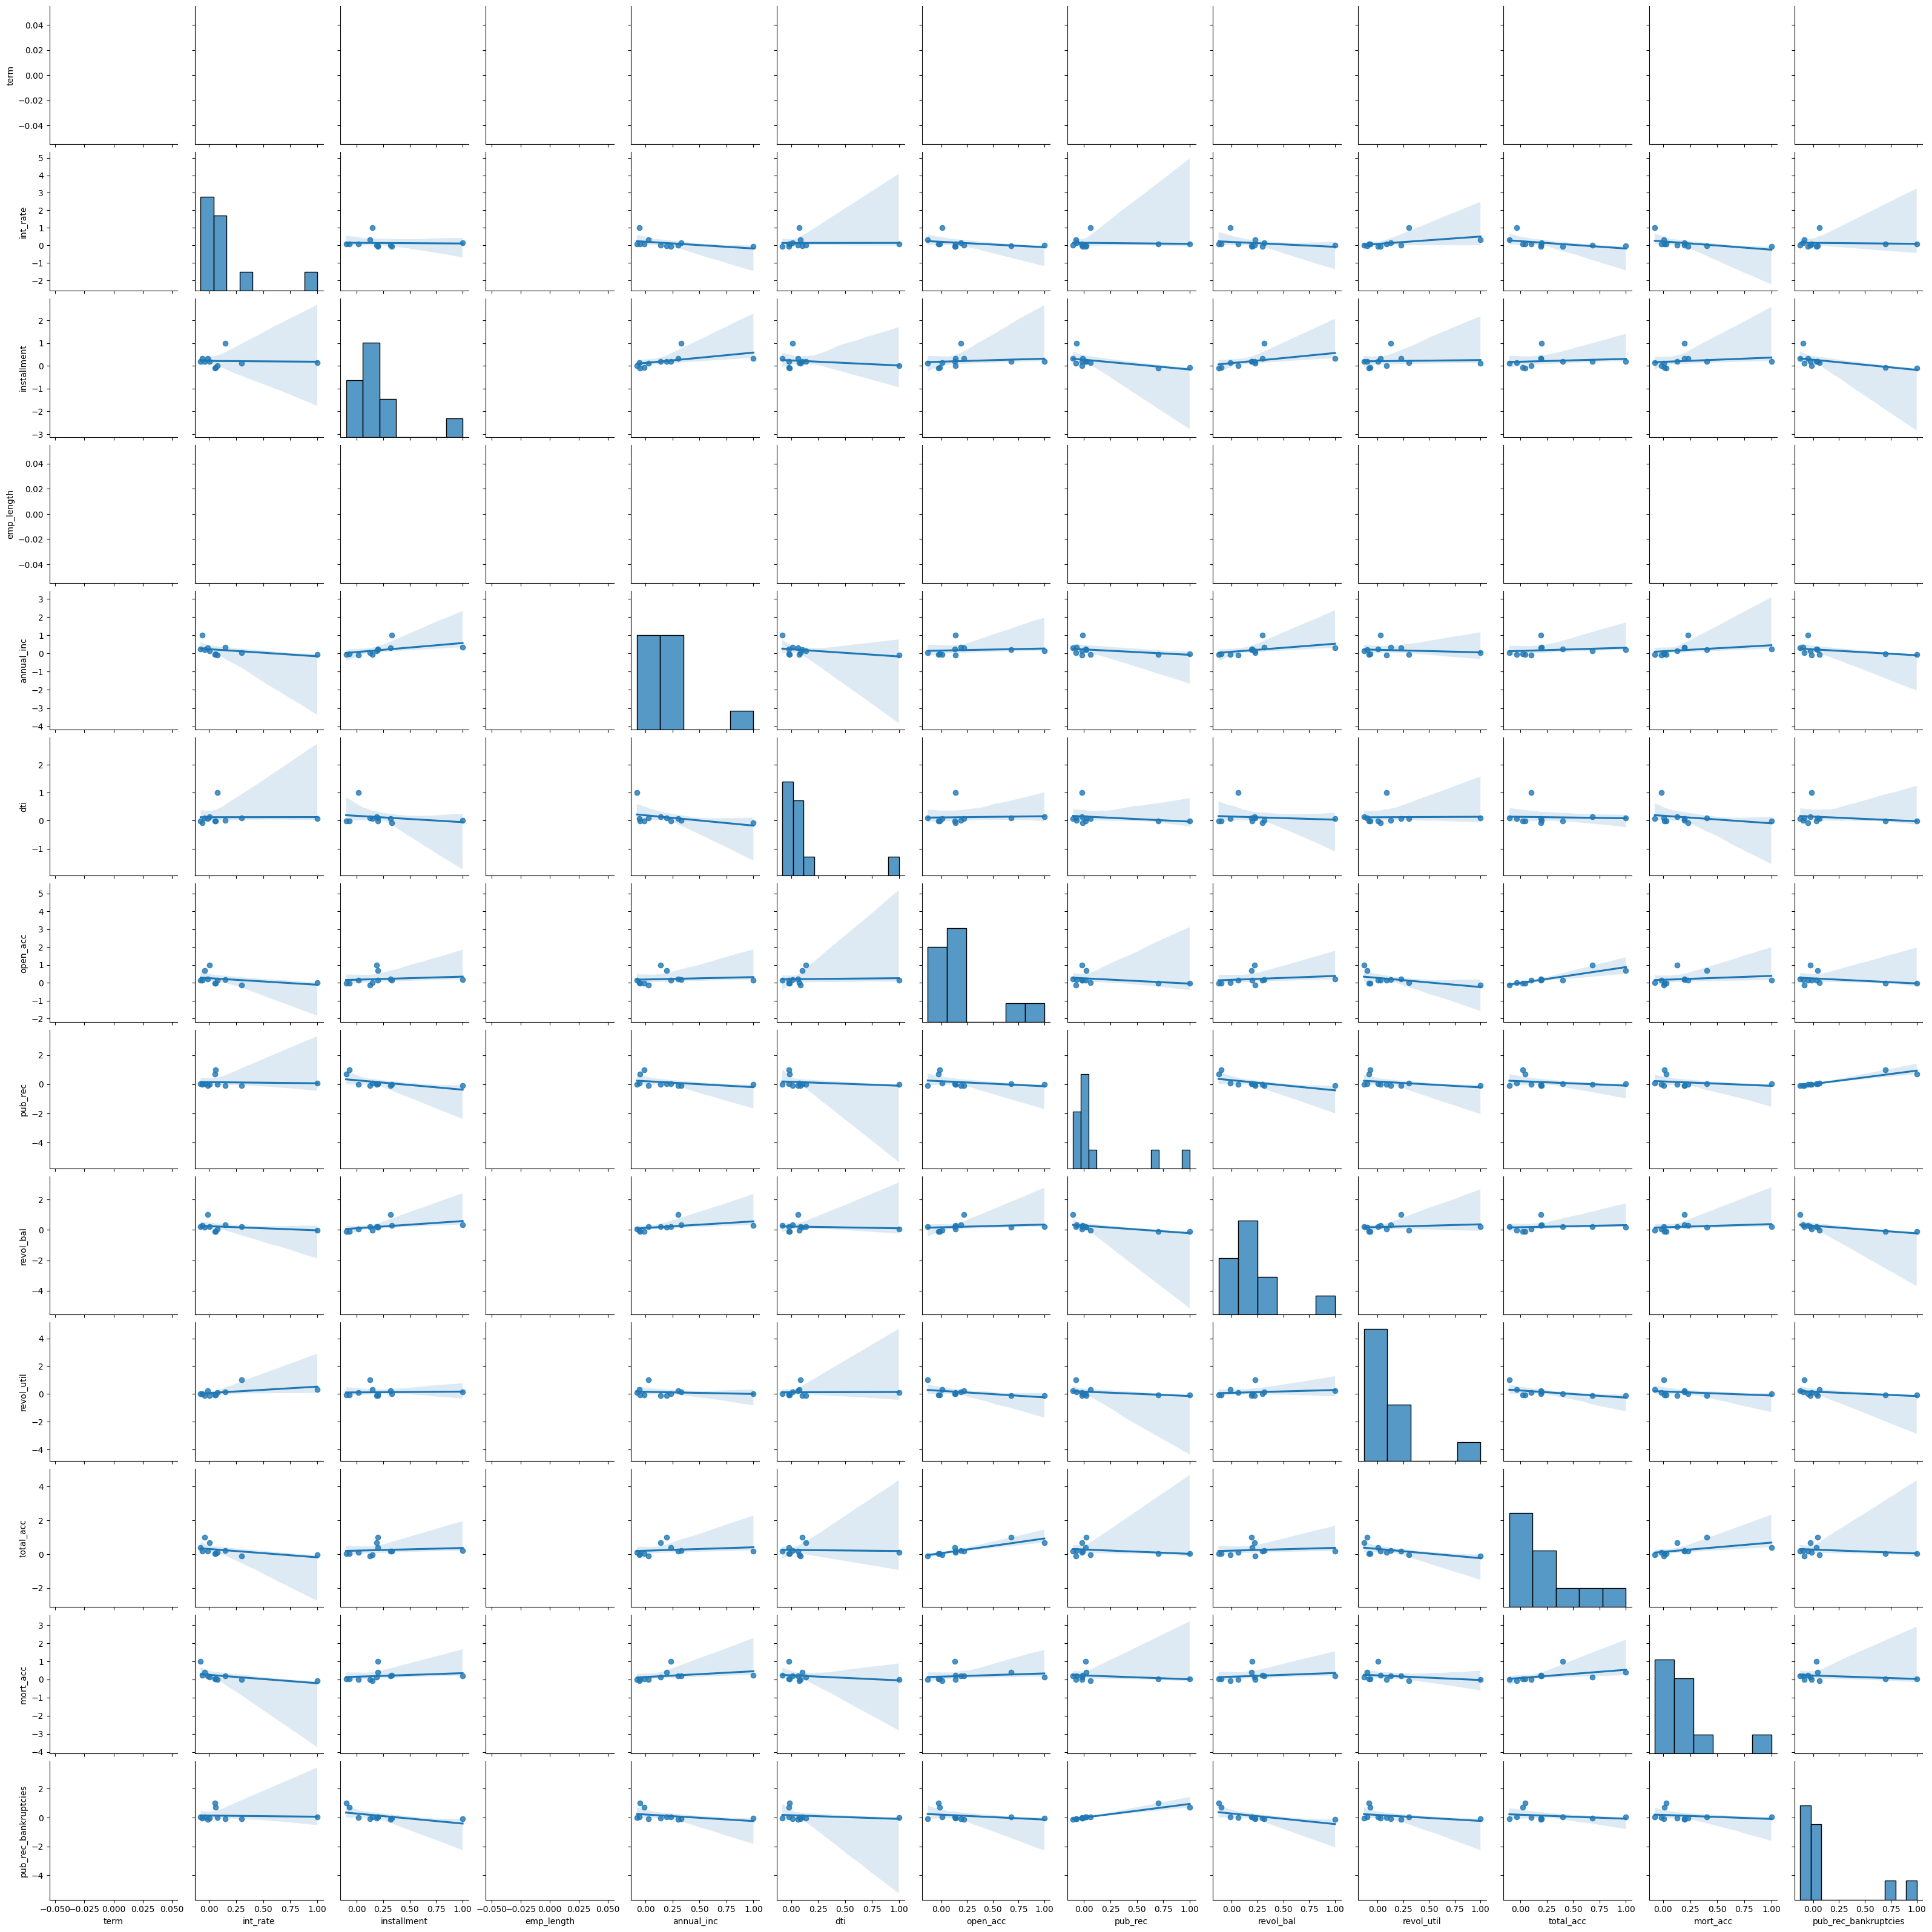

In [ ]:
san.pairplot(df.corr(),kind= 'reg')

Insight:

Every features are in linear relationship with each other, so the model shold be linear as one of the assumption of linaer model is linearity of features.

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

Feature Engineering:

In [ ]:

def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)
# Mapping of target variable
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})
df['initial_list_status'] = df.initial_list_status.map({'w': 0, 'f': 1})
# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df['grade']=df.grade.map({'A':5, 'B':7, 'C':6,'D':4,'E':3,'F':2, 'G':1})
df['home_ownership']=df.home_ownership.map({'MORTGAGE':4,'RENT':3,'OWN':2, 'OTHER':1})



In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    197110
RENT        158770
OWN          37443
OTHER          142
Name: home_ownership, dtype: int64

**Will the results be affected by geographical location? (Yes/No)**

<Axes: xlabel='zip_code'>

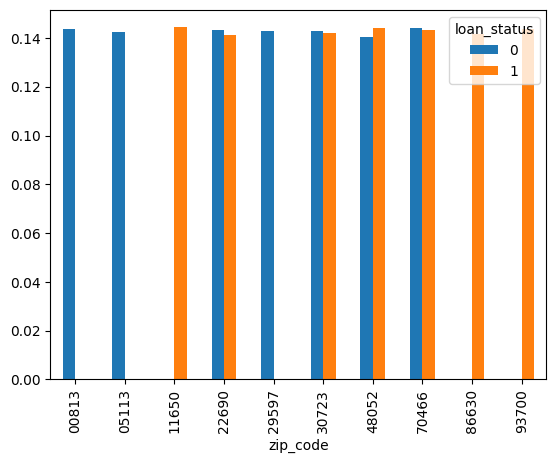

In [ ]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df['zip_code'].value_counts()
pd.crosstab(index = df["zip_code"],
            columns= df["loan_status"],normalize= "columns").plot(kind  = "bar")

Insight: zip_code 00813, 05113 clients fully paid the loan where as 11650, 86630, 93700 are Charged off.
so can say geographical address effect the loan status.

In [ ]:
df['grade'].value_counts()

B    115339
C    105200
A     63824
D     63022
E     31193
F     10396
G       597
Name: grade, dtype: int64

Dropping the columns which has minor impact on target variable:

In [ ]:
df=df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length', 'purpose', 'zip_code', 'verification_status', 'application_type'])

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code'],
      dtype='object')

In [ ]:
dummies=['purpose', 'zip_code', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df,columns=dummies,drop_first=True)

In [ ]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,1,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,1,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,1,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,7200.0,36,6.49,220.65,3,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.0,60,17.27,609.33,2,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [ ]:
df.shape

(389571, 50)

**Logistic data modeling**:

In [ ]:
#separate the target variable:
y=df['loan_status']
X=df.drop('loan_status',axis=1)


In [ ]:
#Spliting data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(311656, 15) (311656,)
(77915, 15) (77915,)


In [ ]:

#scale features using statistics that are robust to outliers, works on quartile range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Logistic Regression as target variable is only of two types
logReg=LogisticRegression(max_iter=1000)
logReg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

**Which were the features that heavily affected the outcome?**

In [ ]:
pd.DataFrame(data=logReg.coef_,columns=X.columns).T

,0
term,0.224512
int_rate,0.429531
installment,0.074059
grade,-0.013754
home_ownership,-0.070099
annual_inc,-0.200181
dti,0.487579
open_acc,0.111785
pub_rec,0.100640
revol_bal,-0.064642


Insight:
Few important features
grade, Annual Income, Interest rate, installment, Mortgaged accounts, total acc,
Home Ownership
term : number of payments on the loan
debt to income ratio are important features.

In [ ]:
#calculate prediction value anAccuracy, Precision score, recall and f1 score
y_pred = logReg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set:',np.round(logReg.score(X_test, y_test),2))
print('precision_score of Logistic Regression Classifier on test set: ', np.round(precision_score(y_test, y_pred),2))
print('Recall_score of Logistic Regression Classifier on test set: ', np.round(recall_score(y_test, y_pred),2))
print('f1_score of Logistic Regression Classifier on test set: ', np.round(f1_score(y_test, y_pred),2))


Accuracy of Logistic Regression Classifier on test set: 0.89
precision_score of Logistic Regression Classifier on test set:  0.94
Recall_score of Logistic Regression Classifier on test set:  0.46
f1_score of Logistic Regression Classifier on test set:  0.62


Insight: Accuracy of Logistic Regression Classifier on test set: 0.89
precision_score of Logistic Regression Classifier on test set:  0.96
Recall_score of Logistic Regression Classifier on test set:  0.45
f1_score of Logistic Regression Classifier on test set:  0.62

**Thinking from a bank's perspective, which metric should our primary focus be on.. ROC AUC Precision Recall F1 Score How does the gap in precision and recall affect the bank?**

The best metric to consider is F1 score as we need to give importance to both precision and recall. We don't want to miss potential customers and at the same time we also don't want to give loan to defaulters


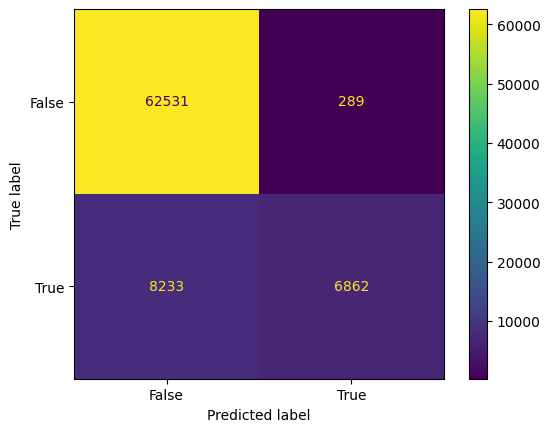

In [ ]:
#Confusion matrix calculation to evalute the accuracy of a classification, such that C i,j
cm=confusion_matrix(y_test,y_pred)
cm_display  = ConfusionMatrixDisplay(confusion_matrix= cm,display_labels=[False,True])
cm_display.plot()
plt.show()

Insight:
1. Confusion matrix indicates that there are 62531 TN(Fully paid) and correctly classified Fully paid and 6862 TP(charged Off) and correctly classified as Charged off.
2. where as 289 FP, they are Fully paid but missclassified as Charged Off and 8233 FN ie. Charged Off data misclassified as Fully paid among all 77915 test datapoints.

**classification_report**


**How does the gap in precision and recall affect the bank?**


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     62820
           1       0.96      0.45      0.62     15095

    accuracy                           0.89     77915
   macro avg       0.92      0.72      0.78     77915
weighted avg       0.90      0.89      0.87     77915



Insight:

A classification report is used to measure the quality of predictions from a classification algorithm. Text summary of the precision, recall, F1 score for each class.
1. Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
Precision - Accuracy of positive predictions.
Precision = TP/(TP + FP)

Here precision value is
(62531/(62351+8233))*100=0.883655=0.88% for class 0(Fully Paid)

(6862/(6862+289))*100=0.9595=.96% for class 1(Charged Off)

2. Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

(62531/(62351+289))*100=0.99539=1.0% for class 0(Fully Paid)

(6862/(6862+8233))*100=0.45458=0.45% for class 1(Charged Off)

3. The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

(2*0.88*1.0)/(0.88+1.0)*100=0.94% for class 0(Fully Paid)

(2*0.96*0.45)/(0.96+0.45)*100=0.62% for class 1(Charged Off)

 Recall score: 0.99 and Precision score: 0.88. Which tells us that there are more false positives than the false negatives.

 From Confusion Matrix it can be seen that FP = 10% of total cases & FN = 0.9% of Total Cases

 If Recall value is low (i.e. FN are high), it means Bank is loosing in opportunity cost.

If Precision value is low (i.e. FP are high), it means Bank's NPA (defaulters) may increase

 ROC AUC Curve & comments:

 ROC plots the true positive rate (TPR) vs the false positive rate (FPR) at different classification thresholds. It plots the true positive rate (TPR) vs the false positive rate (FPR) at different classification thresholds.

 AUC stands for Area Under the Curve, As both TPR and FPR range between 0 to 1, So, the area will always lie between 0 and 1.

 The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.

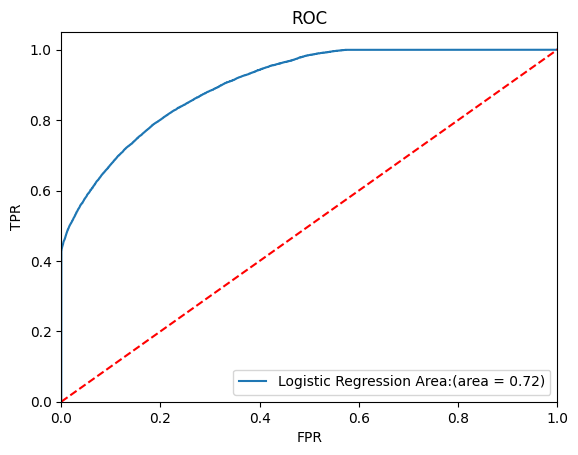

In [ ]:
logistR_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds=roc_curve(y_test,logReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression Area:(area = %0.2f)' %logistR_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

Insight: roc_curve based on roc_auc_score and probability defines the Logistic Regression Area =0.72.

 Precision Recall Curve

 Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

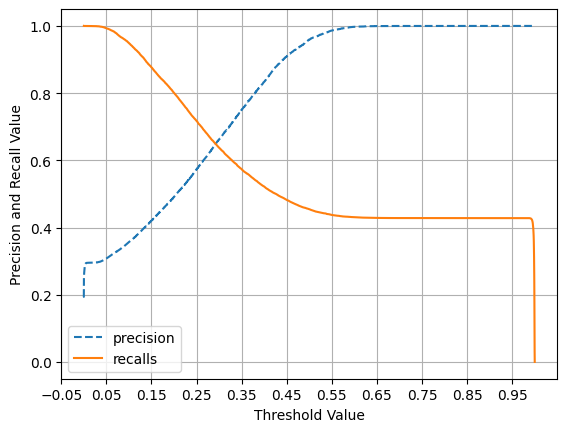

In [ ]:
def precisionRecallCurve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision line
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall line
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precisionRecallCurve_plot(y_test, logReg.predict_proba(X_test)[:,1])

Insight:
From the precision_recall_curve plotting with various threshold values, we can see that the tradeoff between precision and recall is somewhere near 0.3.

**How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it**.

To keep very less False Positives, oversampling techniques like SMOTE should be used in model creation.In the given dataset the percentage of defaulters is slightly higher than Banking industry.

SMOTE is the approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples dont add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

After OverSampling, the shape of train_X: (502580, 49)
After OverSampling, the shape of train_y: (502580,) 

After OverSampling, counts of label '1': 251290
After OverSampling, counts of label '0': 251290


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.94      0.80      0.87     62820
           1       0.49      0.80      0.61     15095

    accuracy                           0.80     77915
   macro avg       0.72      0.80      0.74     77915
weighted avg       0.86      0.80      0.82     77915



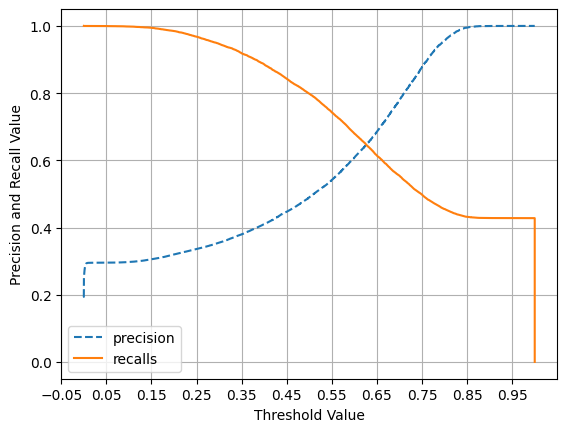

In [ ]:
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])


Insight:
From the precision_recall_curve plotting with various threshold values, we can see that the tradeoff between precision and recall is somewhere near 0.63 earlier without SMOTE it was 0.3 .
Thus clearly shows that SNOTE is the best tradeoff if data are imbalanced.

**Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone**.

LoanTap should not disburse loans to everyone. Company’s internal policy and analysis should be in place to identify the correct persons. From data provided, 20% of people default on their loan, which inturn become NPAs for the company. Low False positive means we should create the model with high Precision values. This can be achieved if we are keeping high threshold value in logistic Regression model.
But keeping too high values for threshold will increase False Negatives. This intuen may result in opportunity loss. In this case we will not give loans to persons which will not default but our model has predicted that they will default.

In [ ]:
print('f1_score of Logistic Regression Classifier on test set: ', np.round(f1_score(y_test, y_pred),2))

f1_score of Logistic Regression Classifier on test set:  0.62


Insight:

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)

f1_score of Logistic Regression Classifier on test set:  0.62

precision_recall_curve_plot at above also show the same for it.

Insight and recommendation:

1.  There are 396030 rows and 27 columns.
2. emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies has null values.

There are 27 columns, among them one is target variable(loan_status) and 26 features. In all features 14 are categorical variable with 2 date and time type datatypes and rest 12 are numerical variable.

3. Loan Amount, Installments, Annual Income , revol_bal : all these columns have large differnece in mean and median and huge standard deviation. That means outliers are present in the data.

4. 1. title, pub_rec_bankruptcies and revol_util has almost 0% NaN value, so we can drop them.The percentage of nan values in mort_acc is more than 9%, so imputing mean values of mort_acc according to group values of total_acc will be fine. Emp_title with anonymous and emp_length with 5.

5.  More loan were applied for 36 months period than 60 months period.Grade B and C has  more loans application than F an G. B3 and B4 give more loans application and G5 and G4 the least. 10+ years submit more loans application, may be because limit is undefined ie more than 10(11,12,13,14...any other).Home owners having status morgage request for loan more..categories of verification doesnt have a great impact. Fully paid client has more loan application.initial list status 'f' applied for the loan the most.Individual applied for the loan the most.

6. . loan amount 10000 was applied the most. mean of interest rate is 13%. installment mean is 300.annual increment 0 almost , open_ac, revol_util are normally destributed. revol_bal total_acc are right skewed.Most of the distribution are right or left skewed shows presence of outlier.
7. very features are in linear relationship with each other, so the model shold be linear as one of the assumption of linaer model is linearity of features.

8. If loan amount isAccuracy of Logistic Regression Classifier on test set: 0.89
precision_score of Logistic Regression Classifier on test set:  0.96
Recall_score of Logistic Regression Classifier on test set:  0.45
f1_score of Logistic Regression Classifier on test set:  0.62
 less(arround 13500), then fully paid else charged off.
Client of charged _off loan status has to pay more intrest rate (16%) where as fully paid has 13.5%. More installment was paid by charged off client. Fully paid client has more annual increment. dti is less for fully paid.open_acc is almost same for both.More derogatory charges on charged off client.revol_bal is higher in fully paid client & vice versa for revol_util.

9. Accuracy of Logistic Regression Classifier on test set: 0.89
precision_score of Logistic Regression Classifier on test set:  0.96
Recall_score of Logistic Regression Classifier on test set:  0.45
f1_score of Logistic Regression Classifier on test set:  0.62

10. Confusion matrix indicates that there are 62531 TN(Fully paid) and correctly classified Fully paid and 6862 TP(charged Off) and correctly classified as Charged off.
2. where as 289 FP, they are Fully paid but missclassified as Charged Off and 8233 FN ie. Charged Off data misclassified as Fully paid among all 77915 test datapoints.
11. A classification report is used to measure the quality of predictions from a classification algorithm. Text summary of the precision, recall, F1 score for each class.

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives. Precision - Accuracy of positive predictions. Precision = TP/(TP + FP)
Here precision value is (62531/(62351+8233))*100=0.883655=0.88% for class 0(Fully Paid)

(6862/(6862+289))*100=0.9595=.96% for class 1(Charged Off)

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Recall: Fraction of positives that were correctly identified. Recall = TP/(TP+FN)
(62531/(62351+289))*100=0.99539=1.0% for class 0(Fully Paid)

(6862/(6862+8233))*100=0.45458=0.45% for class 1(Charged Off)

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. F1 Score = 2*(Recall * Precision) / (Recall + Precision)
(20.881.0)/(0.88+1.0)*100=0.94% for class 0(Fully Paid)

(20.960.45)/(0.96+0.45)*100=0.62% for class 1(Charged Off)

Recall score: 0.99 and Precision score: 0.88. Which tells us that there are more false positives than the false negatives.

From Confusion Matrix it can be seen that FP = 10% of total cases & FN = 0.9% of Total Cases

If Recall value is low (i.e. FN are high), it means Bank is loosing in opportunity cost.

If Precision value is low (i.e. FP are high), it means Bank's NPA (defaulters) may increase

12. From the precision_recall_curve plotting with various threshold values, we can see that the tradeoff between precision and recall is somewhere near 0.63 earlier without SMOTE it was 0.3 .
Thus clearly shows that SNOTE is the best tradeoff if data are imbalanced.